In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
import seaborn as sns

# Association Rules for Book

In [2]:
book=pd.read_csv(r"C:\Users\sagar\Desktop\sagar\sagar_assignment\Assignment9\book.csv")

In [3]:
book.head(2)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


In [4]:
book.shape

(2000, 11)

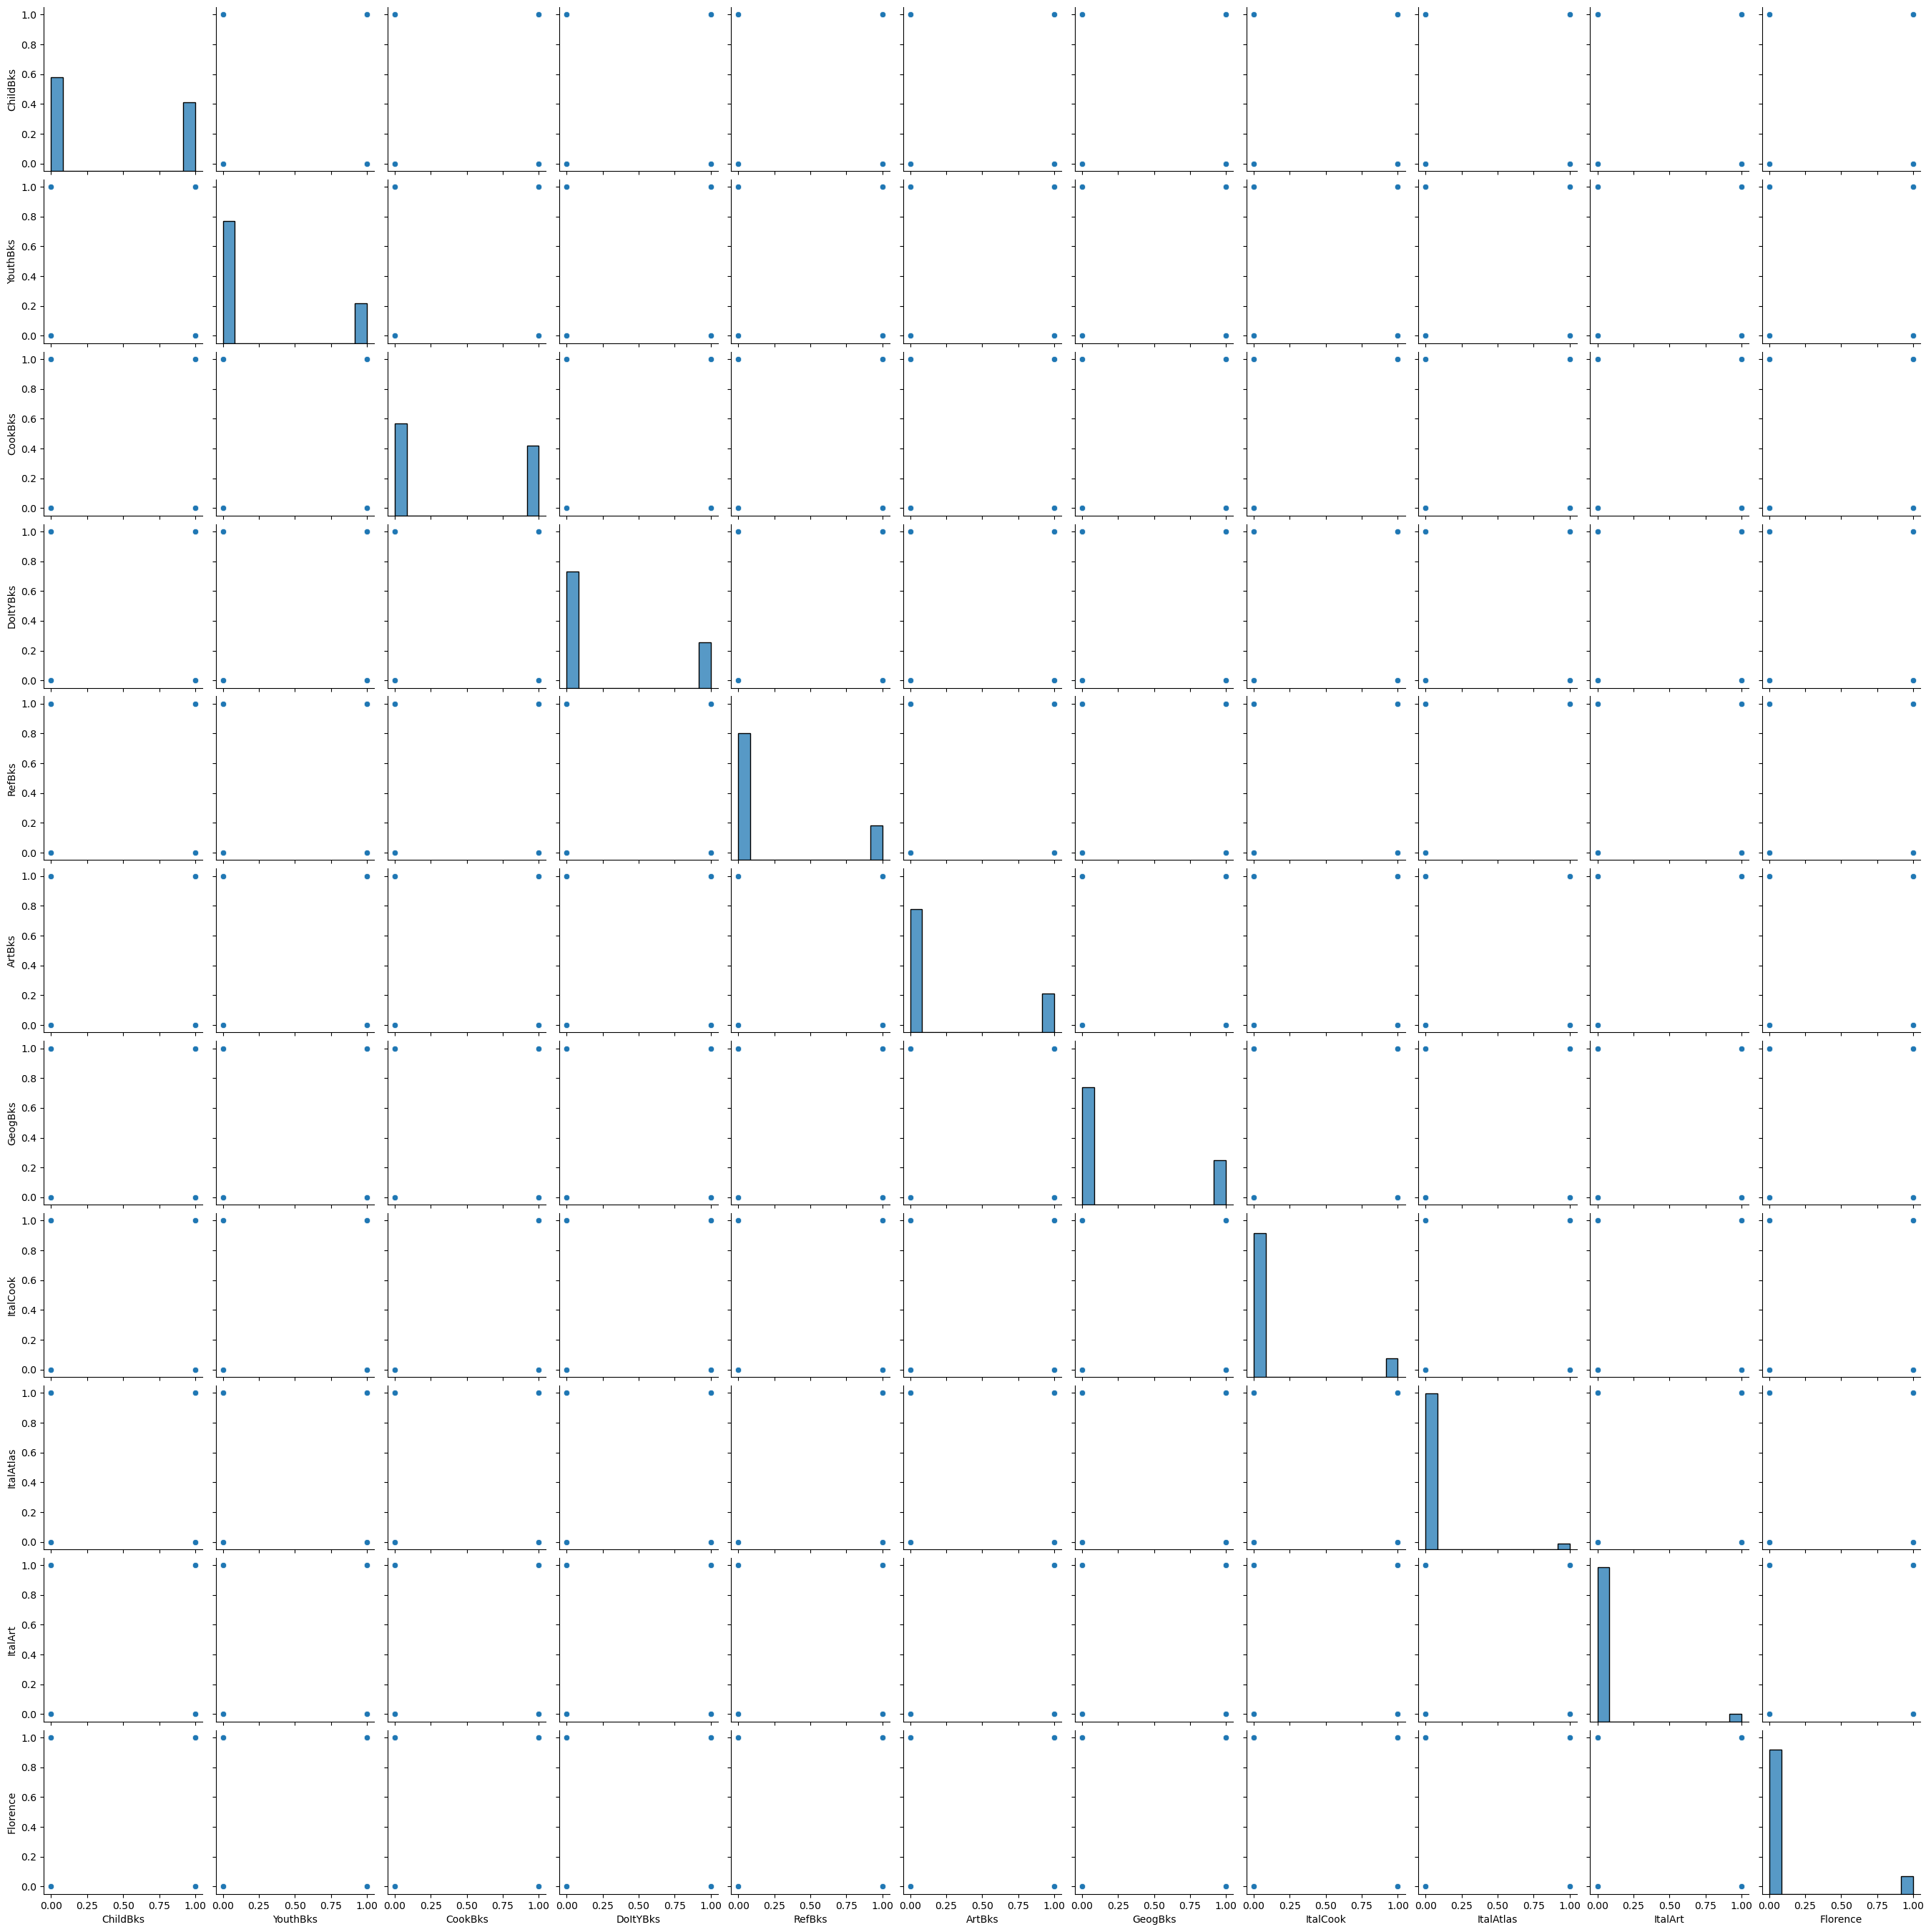

In [5]:
sns.pairplot(book)

In [6]:
frequent2=apriori(book,min_support=0.2,use_colnames=True)
frequent2

C:\Users\sagar\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [7]:
frequent1=apriori(book,min_support=0.1,use_colnames=True)
frequent1

C:\Users\sagar\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [11]:
rules=association_rules(frequent2,metric='lift')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [12]:
rules1=association_rules(frequent1,metric='confidence')
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
2,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
3,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
4,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
5,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812


In [13]:
rules1=association_rules(frequent1,metric='lift',min_threshold=1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [14]:
lift=rules1.sort_values('lift',ascending='False')
lift


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf


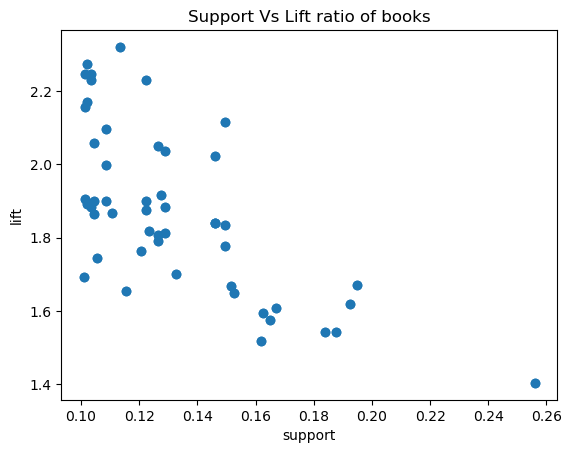

In [15]:
import matplotlib.pyplot as plt
plt.scatter(rules1['support'],rules1['lift'])
plt.title('Support Vs Lift ratio of books')
plt.xlabel('support')
plt.ylabel('lift')
plt.show()



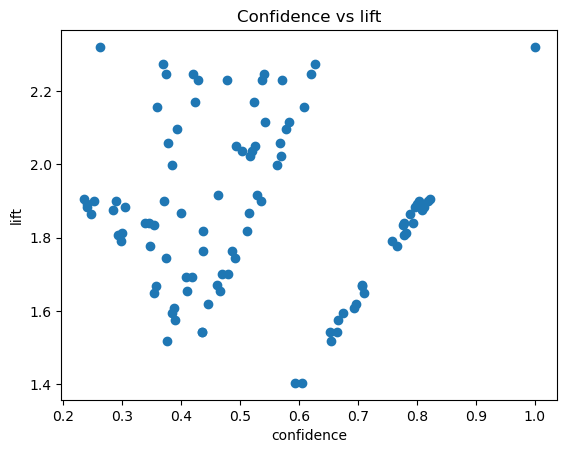

In [16]:
plt.scatter(rules1['confidence'],rules1['lift'])
plt.title('Confidence vs lift')
plt.xlabel('confidence')
plt.ylabel('lift')
plt.show()

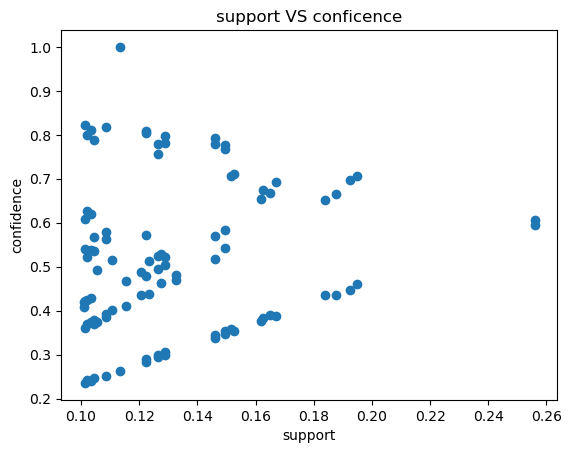

In [17]:
plt.scatter(rules1['support'],rules1['confidence'])
plt.title('support VS conficence')
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

# Association Rule for Movies

In [19]:
movie=pd.read_csv(r"C:\Users\sagar\Desktop\sagar\sagar_assignment\Assignment9\my_movies.csv")
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [20]:
data=pd.get_dummies(movie)
data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [21]:
data.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000,...,0.100000,0.100000,0.100000,0.600000,0.100000,0.100000,0.100000,0.400000,0.200000,0.100000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637,...,0.316228,0.316228,0.316228,0.516398,0.316228,0.316228,0.316228,0.516398,0.421637,0.316228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
item=apriori(data,min_support=0.1,use_colnames=True)
item

C:\Users\sagar\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Sixth Sense, Green Mile, V2_LOTR1, V1_Sixth S..."
1393,0.1,"(Sixth Sense, Green Mile, V2_LOTR1, V1_Sixth S..."
1394,0.1,"(Sixth Sense, Green Mile, V2_LOTR1, V1_Sixth S..."
1395,0.1,"(Green Mile, V2_LOTR1, V1_Sixth Sense, LOTR1, ..."


In [23]:
rules=association_rules(item,metric='confidence')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(V2_LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
56754,"(V5_LOTR2, LOTR2)","(Sixth Sense, V2_LOTR1, Green Mile, V1_Sixth S...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56755,"(V3_Harry Potter1, LOTR2)","(Sixth Sense, V2_LOTR1, Green Mile, V1_Sixth S...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56756,(V2_LOTR1),"(Sixth Sense, Green Mile, V1_Sixth Sense, LOTR...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
56757,(V5_LOTR2),"(Sixth Sense, Green Mile, V2_LOTR1, V1_Sixth S...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


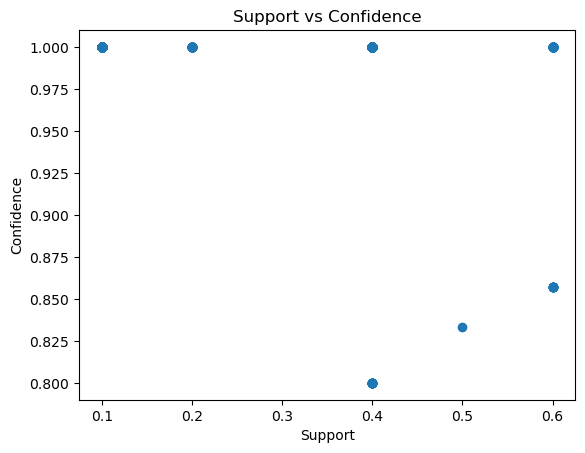

In [24]:
plt.scatter(rules['support'],rules['confidence'])
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [25]:
rules=association_rules(item,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64211,(V4_Green Mile),"(Sixth Sense, Green Mile, V2_LOTR1, V1_Sixth S...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64212,(Harry Potter1),"(Sixth Sense, Green Mile, V2_LOTR1, V1_Sixth S...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64213,(V5_LOTR2),"(Sixth Sense, Green Mile, V2_LOTR1, V1_Sixth S...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64214,(V3_Harry Potter1),"(Sixth Sense, Green Mile, V2_LOTR1, V1_Sixth S...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [26]:
rules.sort_values('lift',ascending='False')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
215,(V1_Sixth Sense),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.5,1.0,0.00,1.0
243,(V4_Green Mile),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.5,1.0,0.00,1.0
6269,"(Sixth Sense, Gladiator)","(Green Mile, V4_Green Mile, V1_Sixth Sense)",0.5,0.2,0.1,0.2,1.0,0.00,1.0
6266,"(Green Mile, V4_Green Mile, V1_Sixth Sense)","(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.5,1.0,0.00,1.0
240,"(Sixth Sense, Gladiator)",(V4_Green Mile),0.5,0.2,0.1,0.2,1.0,0.00,1.0
...,...,...,...,...,...,...,...,...,...
29684,"(Green Mile, V2_LOTR1, Harry Potter1)","(V5_LOTR2, V4_Green Mile, V3_Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
29685,"(Green Mile, V2_LOTR1, V5_LOTR2)","(V3_Harry Potter1, V4_Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
29686,"(Green Mile, V2_LOTR1, V3_Harry Potter1)","(V5_LOTR2, V4_Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
29688,"(Green Mile, V4_Green Mile, V5_LOTR2)","(V3_Harry Potter1, V2_LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


# lift ratio >1 that is useful